# DS-SF-36 | Unit Project | 1 | Research Design | Starter Code

In this first unit project, you will create a framework to scope out data science projects.  This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Part A.  Evaluate the following problem statement:

> "Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and `activity score 1 = active user`, `0 = inactive user`) based on Hooli data from January-April 2015."

> ### Question 1.  What is the outcome?

Answer: The outcome is to predict which free-tier customers will convert to paying customers with yes or no.

> ### Question 2.  What are the predictors/covariates?

Answer: The preditors are age, gender, location, profession, days since last log in, activity score.

> ### Question 3.  What timeframe is this data relevent for?

Answer: From January - April 2015.

> ### Question 4.  What is the hypothesis?

Answer: The hypothesis is that demographics data collected at signup, along with customer usage data, will successfully predict whether a free-tier customer will convert to paying customer. 

## Part B.  Let's start exploring our UCLA dataset and answer some simple questions:

In [3]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 24)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


In [3]:
df.prestige.unique()

array([  3.,   1.,   4.,   2.,  nan])

In [4]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


> ### Question 5.  Create a data dictionary.

In [10]:
dict = [{'variable': 'admit', 'description': 'student application status. 1=admit, 0=deny', 'type': 'binary'},
         {'variable': 'gre', 'description': 'GRE score, from 220-800', 'type': 'continuous'},
         {'variable': 'gpa', 'description': 'GPA score, from 2.26-4', 'type': 'continuous'},
         {'variable': 'prestige', 'description': 'prestige ranking, from 1-4, 1 being the lowest', 'type': 'categorical'}]
df_dict = pd.DataFrame(dict)
df_dict

,description,type,variable
0,"student application status. 1=admit, 0=deny",binary,admit
1,"GRE score, from 220-800",continuous,gre
2,"GPA score, from 2.26-4",continuous,gpa
3,"prestige ranking, from 1-4, 1 being the lowest",categorical,prestige


Answer: 

We would like to explore the association between X and Y.

> ### Question 6.  What is the outcome?

Answer: The outcome is a prediction admission into UCLA, where 1=admitted, and 0=not admitted.

> ### Question 7.  What are the predictors/covariates?

Answer: The predictors are gre, gpa, and prestige.

> ### Question 8.  What timeframe is this data relevent for?

Answer: The data does not have specific timeframe.

> ### Question 9.  What is the hypothesis?

Answer: The hypothesis is that knowing a student's gre, gpa and prestige status, we can predict whether he/she is admitted to UCLA.

> ### Question 10.  What's the problem statement?

> Using your answers to the above questions, write a well-formed problem statement.

Answer: Predict which student will be admitted to UCLA, using his GRE score, GPA, and prestige ranking.  We can't determine the timeframe of this data because there is no data field in the dataset.

## Part C.  Create an exploratory analysis plan by answering the following questions:

> ### Question 11. What are the goals of the exploratory analysis?

Because the answers to these questions haven't yet been covered in class yet, this section is optional.  This is by design.  By having you guess or look around for these answers will help make sense once we cover this material in class.  You will not be penalized for wrong answers but we encourage you to give it a try!

Answer: The goal of the exploratory analysis are: 
    1) to assess the quality of the data.  This can include both incorrect data & missing data.
    2) to understand basic relationships among the variables.  This can include analyzing relationship between independent variables as well as between independent and dependent variables.
    3) help visualize the data.

> ### Question 12.  What are the assumptions of the distribution of data?

Answer: GRE and GPA are continuous variables.  Admit is a binary dependent variable.  Prestige is discrete (ordinal).

> ### Question 13.  How will determine the distribution of your data?

Answer: We can look at the histograms of the variable.  If there are only 2 unique values, it's binary.  If it has a few values, it's discrete.  If it has many values, it's continuous.

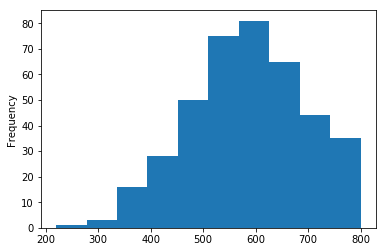

In [32]:
df['gre'].plot.hist()

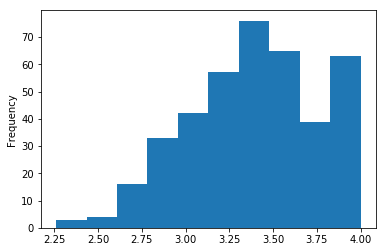

In [33]:
df['gpa'].plot.hist()

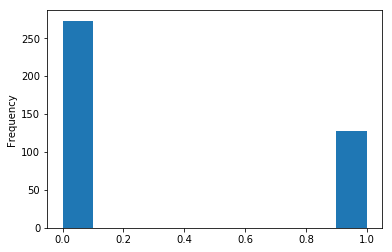

In [4]:
df.admit.plot.hist()

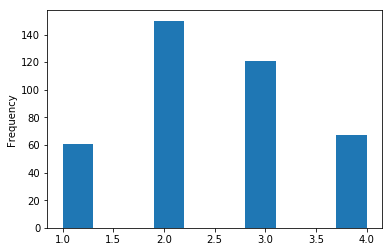

In [5]:
df.prestige.plot.hist()

> ### Question 14.  How might outliers impact your analysis?

Answer: Some analysis are sensitive to outliers such as mean.  And some modeling applications are sensitive to outliers as well such as regression, because the resulting equation will weigh heavily in favor of the outlier(s).  

> ### Question 15.  How will you test for outliers?

Answer: There are several ways to test for outliers:
    1. Values 1.5 interquartile ranges below the first quartile (Q1), or at least 1.5 interquartile ranges above the third quartile (Q3).  We can use boxplot to view this.
    2. Values outside of the +/- 2 (or 3) standard deviations away from the mean are outliers.

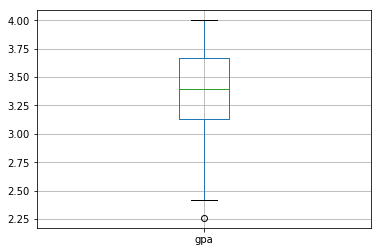

In [32]:
df[['gpa']].boxplot(figsize = (8, 8))

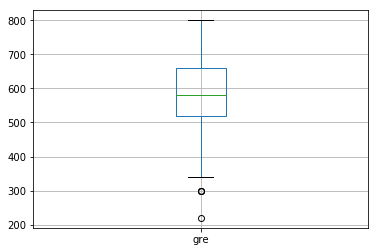

In [33]:
df[['gre']].boxplot(figsize = (8, 8))

> ### Question 16.  What is colinearity?

Answer: Colinearity happens when two independent variables are highly correlated to each other.  The correlation matrix below shows that gre and gpa are 38% correlated.  GPA and prestige are nearly uncorrelated.  The most surprising is that none of the 3 features, gre, gpa and prestige are strongly correlated to admission.

In [38]:
df.corr()
#plt.matshow(df.corr())

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [6]:
color = df.admit.map({1: 'blue', 0: 'red'})


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7AB7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E169C50>]], dtype=object)

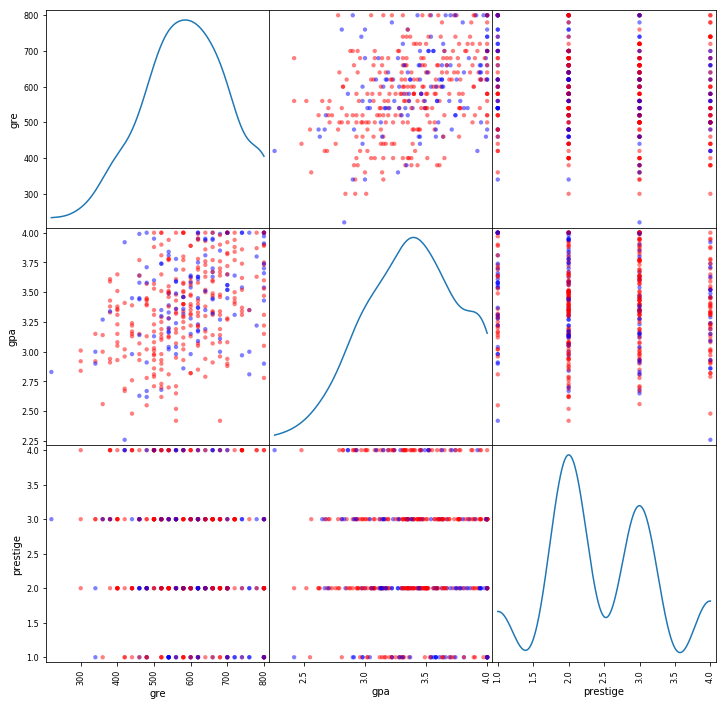

In [25]:
pd.tools.plotting.scatter_matrix(
    df[ ['gre', 'gpa', 'prestige'] ],
    diagonal = 'kde', s = 75, c = color, figsize = (12, 12)
)

> ### Question 17.  How will you test for covariance?

Answer: You can test covariance by using the cov() methods with pandas.

In [11]:
df.cov()

,admit,gre,gpa,prestige
admit,0.217237,9.871271,0.031191,-0.106189
gre,9.871271,13369.953040,16.824761,-13.648068
gpa,0.031191,16.824761,0.144879,-0.021260
prestige,-0.106189,-13.648068,-0.021260,0.893654


> ### Question 18.  What is your exploratory analysis plan?

> Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now.

Answer: We can perform an EDA with these:
    1. Check the distribution of every variable in the dataset, and see if there is high amount of missing or incorrect data in there.
    2. Check outliers using box plot.
    3. Check correlation and covariance among all the variables.
    4. Use Scatter plot to plot the relationship between all the variables.
    5. Since the dependent variable is binary, one thing I would like to check is the mean of the independent variables in the two different values of the dependent variable (see below).  On average you can see that students who are admitted have higher GRE, higher GPA, and lower prestige.

In [16]:
df.groupby('admit').mean()

,gre,gpa,prestige
admit,,,
0,573.579336,3.345404,2.641026
1,618.897638,3.489206,2.150794
